In [1]:
import numpy as np
from scipy.stats import distributions
import matplotlib.pyplot as plt
from classes.dpm import BaseMeasure, DPM, NormalBaseMeasure
from classes.likelihood import NormalLikelihood
from classes.variables import Normal, InvGamma

In [2]:
mu1 = -1
mu2 = 1
w1 = 0.5
xmin = -3
xmax = 3
xrange = np.arange(xmin,xmax,0.01)
def f(X, w1=w1) -> np.ndarray:
    return w1*distributions.norm.pdf(X, loc=mu1, scale=1.0) + (1-w1)*distributions.norm.pdf(X, loc=mu2, scale=1.0)

y = np.array([-1.42064144,  0.68615248, -0.12268064, -1.56841365,  0.77278432,
              -2.9957832 , -0.80084822, -1.5276294 , -0.96945657, -0.42762472,
              0.06589666, 1.72620247, 2.53837067, 2.06008666])

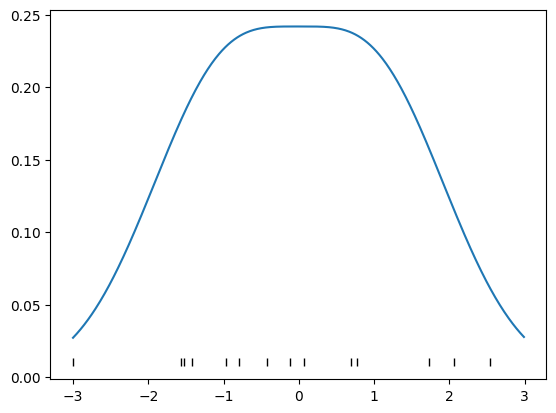

In [3]:
plt.plot(y, [0.01]*len(y), '|', color="k")
plt.plot(xrange, f(xrange))

In [4]:
s = np.array([0, 1, 1, 1, 1, 1, 2, 2, 3, 2, 2, 2, 2, 2])

measures = [
    [-5, 1],
    [-2, 1],
    [2, 1],
    [5, 1]]

id(s)


4816617264

In [5]:
base_measure = NormalBaseMeasure([Normal(mu=0,sigma=3), InvGamma()])
dpm = DPM(base_measure)

dpm.set_dataset(y, s)

dpm.set_measures(measures)
dpm.set_weights()

print(s, id(s))
dpm.sample(100)

print(s, id(s))

[0 1 1 1 1 1 2 2 3 2 2 2 2 2] 4816617264
Acceptance Rate: 61/100 = 61.000%
Acceptance Rate: 77/100 = 77.000%
Acceptance Rate: 88/100 = 88.000%
Acceptance Rate: 79/100 = 79.000%
Acceptance Rate: 70/100 = 70.000%
Acceptance Rate: 63/100 = 63.000%
Acceptance Rate: 61/100 = 61.000%
Acceptance Rate: 60/100 = 60.000%
Acceptance Rate: 89/100 = 89.000%
Acceptance Rate: 68/100 = 68.000%
Acceptance Rate: 75/100 = 75.000%
Acceptance Rate: 71/100 = 71.000%
Acceptance Rate: 95/100 = 95.000%
Acceptance Rate: 80/100 = 80.000%
Acceptance Rate: 81/100 = 81.000%
Acceptance Rate: 96/100 = 96.000%
Acceptance Rate: 73/100 = 73.000%
Acceptance Rate: 65/100 = 65.000%
Acceptance Rate: 73/100 = 73.000%
Acceptance Rate: 87/100 = 87.000%
Acceptance Rate: 67/100 = 67.000%
Acceptance Rate: 97/100 = 97.000%
Acceptance Rate: 81/100 = 81.000%
Acceptance Rate: 75/100 = 75.000%
Acceptance Rate: 84/100 = 84.000%
Acceptance Rate: 59/100 = 59.000%
Acceptance Rate: 56/100 = 56.000%
Acceptance Rate: 86/100 = 86.000%
Accepta

In [6]:
chain = dpm._dpm_chain
results = {"w": chain.w, "theta": chain.phi, "n_clusters": chain.n}

In [7]:
def plot_posterior_density(x, results:dict):
    w = results["w"][:]
    t = results["theta"][:]

    big_X = np.arange(np.min(x)-2, np.max(x)+2, 0.01)

    fig, ax = plt.subplots(1,2, figsize=(12, 6))

    a, b = np.unique(results["n_clusters"], return_counts=True)
    ax[0].bar(x=a, height=b)


    for i in range(len(w)):
        len_w = len(w[i])

        y = []
        mu = np.array(t[i])[:,0]
        sigma = np.array(t[i])[:,1]

        for j in range(len_w):
            y.append(w[i][j] * distributions.norm.pdf(big_X, loc=mu[j], scale=sigma[j]))

            
        y = np.sum(y, axis=0)

        ax[1].plot(big_X, y, color="k", alpha=0.05)

    ax[1].plot(x, [0.01]*len(x), '|', color="k")
    ax[1].plot(np.arange(-4, 4, 0.01), f(np.arange(-4, 4, 0.01)))


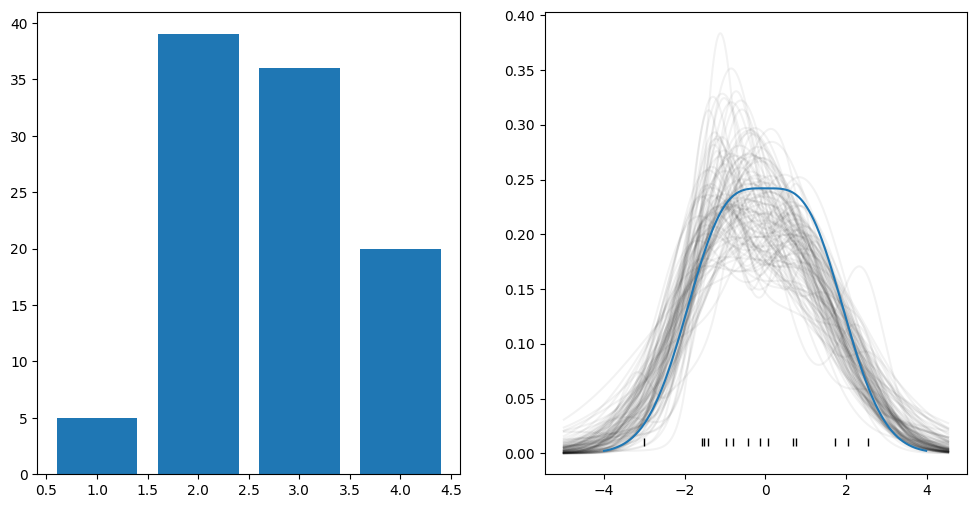

In [8]:
plot_posterior_density(y, results)